# Real-Fake-News

A Labeled News Corpus for Training and Evaluating Fake News Detection Models

# I. Business Understanding

This phase focuses on understanding the objectives and requirements of the project.

**Use Cases:**

Training NLP models for binary classification (fake vs real)

Sentiment and subject analysis of misinformation

Exploring linguistic patterns between authentic and deceptive news

# II. Data Understanding

This phase drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals. This phase also has four tasks:

1. **Collect initial data:** Acquire the necessary data and (if necessary) load it into your analysis tool.
2. **Describe data:** Examine the data and document its surface properties like data format, number of records, or field identities.
3. **Explore data:** Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
4. **Verify data quality:** How clean/dirty is the data? Document any quality issues.

### About Dataset
Fake News Detection Dataset

This dataset is divided into two parts:

1. True.csv – Contains 21,417 verified news articles with four key attributes:

title: The headline of the article

text: The full body of the news article

subject: The category or theme (e.g., politics, world news, etc.)

date: The date of publication

2. Fake.csv – Includes 23,481 fabricated news articles with the same structure and attributes as the True dataset.

In [1]:
# data analysis and manipulation tool
import pandas as pd

# perform numerical computation
import numpy as np

# data viz library
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Code below imports all code in the custom_func file
from Data.reusable_functions import  *

### True.csv review

In [3]:
# load the True dataset
df_True = pd.read_csv('Data/True.csv')
df_True.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_True.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
df_True.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [6]:
# imported function from reusable_functions.py
unique_col_items(df_True, 'subject')

array(['politicsNews', 'worldnews'], dtype=object)

### Visualize df_True dataset

### Fake.csv review

In [7]:
# load the Fake dataset
df_Fake = pd.read_csv('Data/Fake.csv')
df_Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
# imported function from reusable_functions.py
unique_col_items(df_Fake, 'subject')

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

# III. Data Preparation

This phase, which is often referred to as “data munging”, prepares the final data set(s) for modeling. It has five tasks:

1. **Select data:** Determine which data sets will be used and document reasons for inclusion/exclusion.
2. **Clean data:** Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
3. **Construct data:** Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
4. **Integrate data:** Create new data sets by combining data from multiple sources.
5. **Format data:** Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

Create column label in each dataset to indicate whether the news is real or fake. 

The True.csv will have label 1 and Fake.csv will have label 0.

In [9]:
# True news has label 1 
df_True['label'] = 1

# Fake news has label 0
df_Fake['label'] = 0

In [10]:
df_True.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
df_Fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
print(f'True news {df_True.shape}')
print("")
print(f'Fake news {df_Fake.shape}')

True news (21417, 5)

Fake news (23481, 5)


#### Concatenate both datasets into a single DataFrame.

In [13]:
true_fake_df = pd.concat([df_True, df_Fake], ignore_index=True)

In [14]:
true_fake_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [15]:
true_fake_df.shape

(44898, 5)

### Data Cleaning

In [16]:
#check for null values
true_fake_df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Drop unnecessary columns, such as 'date' and 'subject', as they are not needed for the classification task.

In [17]:
true_fake_df = true_fake_df.drop(columns=['date', 'subject'], axis=1)

In [18]:
true_fake_df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


Creating a new column 'content' combining title and text

In [19]:
true_fake_df["content"] = true_fake_df["title"] + " " + true_fake_df["text"]

In [20]:
true_fake_df.head()

,title,text,label,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,Trump wants Postal Service to charge 'much mor...


Final Columns to be used for classification:

In [21]:
final_true_fake_df = true_fake_df[["content", "label"]]

In [22]:
final_true_fake_df

,content,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,How to Blow $700 Million: Al Jazeera America F...,0


### Shuffle the DataFrame

1. Preventing Bias:

If the data is ordered in a specific way (e.g., by class label, time, or feature value), splitting it into training and test sets without shuffling can lead to biased sets. For example, the training set might contain only examples from one class, while the test set contains examples from another class. This can result in poor model performance and generalization.
Shuffling ensures that the training and test sets are representative of the overall data distribution, reducing the risk of overfitting to a specific order or pattern.

2. Improving Model Generalization:

Models trained on non-shuffled data might learn artificial patterns related to the data's inherent order rather than the underlying relationships between features and target variables.
Shuffling encourages the model to learn more robust and generalizable patterns, improving its ability to perform well on unseen data.

3. Ensuring Reliable Cross-Validation:

In cross-validation, the data is split into multiple folds. Without shuffling, some folds might be unrepresentative of the overall dataset, leading to unreliable cross-validation results.
Shuffling ensures that each fold contains a mix of different data points, providing a more accurate estimate of the model's performance.

4. Enhancing Gradient Descent:

When training neural networks with mini-batches, shuffling helps ensure that each mini-batch is representative of the overall data distribution. This leads to more stable and efficient gradient updates.
Without shuffling, the network might learn to predict the sequence of data points rather than the actual relationships between features and targets.

5. Reproducibility:

Shuffling ensures that any observed patterns are not due to data order and that results are reproducible.

**In summary, shuffling a dataframe before modeling helps prevent bias, improve model generalization, and ensure reliable evaluation. It is a crucial step in preparing data for machine learning tasks.**

In [23]:
final_true_fake_df = final_true_fake_df.sample(frac=1, random_state=537).reset_index(drop=True)

In [24]:
final_true_fake_df

,content,label
0,Figures show Trump spent $66 million of his ow...,1
1,Trump raises about $90 million in August WASH...,1
2,Iran's Soleimani arrives in Kurdish region for...,1
3,Putin Declares Syria A “No Fly Zone”…While Oba...,0
4,Remember Trump’s Biggest Campaign Promise? Ye...,0
...,...,...
44893,Low-Income Renters Lose Their Homes To Rich P...,0
44894,WATCH: DID JOHNNY DEPP Just Make A Career-Endi...,0
44895,#TREXIT: SWING STATE APOCALYPSE…Democrats LEAV...,0
44896,Turkey's Erdogan blames U.S. envoy for diploma...,1


In [25]:
final_true_fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  44898 non-null  object
 1   label    44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [26]:
final_true_fake_df.isnull().sum()

content    0
label      0
dtype: int64

### Text Cleaning

In [27]:
# Import relevant Libraries

import re

import contractions
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
# nltk.download('stopwords')
# nltk.download('wordnet')

# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')

In [28]:
# stopwords
stop_words = set(stopwords.words("english"))

# WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
# Function to clean and preprocess the text
def preprocess_text(text) -> str:

    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Remove mentions
    text = re.sub(r'rt @\w+: | @\w+: | @\w+ | @ \w+', '', text)

    # Step 3: Expand contractions
    text = contractions.fix(text)

    # remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Step 4: Remove html tags
    text = re.sub(r'<.*?>', '', text)

    # Step 5: Remove ellipses and unnecessary spaces
    text = re.sub(r'\.{2,}', ' ', text)  # Replace multiple dots with a single space 
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

    # Step 6: Remove special characters (keeping only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Step 7: Remove HTML links
    text = re.sub(r'http\S+|www\S+', '', text)

    # Step 8: Replace elongated words (e.g., "sooooo" -> "so")
    text = re.sub(r'(\w+?)\1{2,}', r'\1\1', text)  # Replace any character repeated more than twice

    # Step 9: Remove possessives (e.g., "ann's" -> "ann")
    text = re.sub(r"\b(\w+)'s\b", r'\1', text)

    # Step 10: Tokenize
    words = nltk.word_tokenize(text)

    # Step 11: Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    return " ".join(words)

In [30]:
# Example usage
text = "Figures show Trump spent $66 million of his ow..."
cleaned_text = preprocess_text(text)
print(cleaned_text)

figure show trump spent million ow


In [31]:
# Apply the preprocessing function to the 'content' column
final_true_fake_df['content'] = final_true_fake_df['content'].apply(preprocess_text)

In [32]:
final_true_fake_df

,content,label
0,figure show trump spent million cash election ...,1
1,trump raise million august washington reuters ...,1
2,iran soleimani arrives kurdish region talk cri...,1
3,putin declares syria fly zonewhile obama laser...,0
4,remember trump biggest campaign promise yeah w...,0
...,...,...
44893,lowincome renter lose home rich people neighbo...,0
44894,watch johnny depp make careerending joke assas...,0
44895,trexit swing state apocalypsedemocrats leave p...,0
44896,turkey erdogan blame yous envoy diplomatic cri...,1


#### Distribution of News Length

In [33]:
final_true_fake_df["text_length"] = final_true_fake_df["content"].apply(lambda x: len(x.split()))

In [34]:
final_true_fake_df["text_length"].describe()

count    44898.000000
mean       237.359504
std        198.878080
min          0.000000
25%        125.000000
50%        210.000000
75%        295.000000
max       4853.000000
Name: text_length, dtype: float64

### Train-Test Split

In [35]:
#Import relevant library

from sklearn.model_selection import train_test_split

In [36]:
# Train-Test Split

X = final_true_fake_df['content'] # Features
y = final_true_fake_df['label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the resulting datasets
print("Training set shape:", X_train.shape)

print("---------------------------")

print("Testing set shape:", X_test.shape)

Training set shape: (35918,)
---------------------------
Testing set shape: (8980,)


In [37]:
X_train.head()  

29518    obama delay spain visit government formed fore...
14421    peter thiel tell republican convention proud g...
34984    gop chairman declared war trump tweet leading ...
3890     lebanon hariri take critical line hezbollah be...
19062    tunisian labor union say jerusalem decision de...
Name: content, dtype: object

In [38]:
X_test.head()

14757    month trial north korean mastermind behind kim...
7798     turkey take stronger step response iraqi kurdi...
16838    veteran send loser trump brutal message keep d...
29352    yous interior secretary raised political fund ...
44887    plane crash russia far east kill six report mo...
Name: content, dtype: object

### Feature Extraction

Transforming arbitrary data, such as text or images, into numerical features usable for machine learning.

In [39]:
# Import relevant library for text vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# Create a TfidfVectorizer instance
# This will convert the text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2)) 

# Note: Use X_train for fitting and X_test for transforming

# Fit and transform the training data
X_train_vector = vectorizer.fit_transform(X_train)

# transform the test data
X_test_vector = vectorizer.transform(X_test)

In [41]:
X_train_vector.shape

(35918, 5000)

# IV. Modeling

What is widely regarded as data science’s most exciting work is also often the shortest phase of the project. Here you’ll likely build and assess various models based on several different modeling techniques. This phase has four tasks:

1. **Select modeling techniques:** Determine which algorithms to try (e.g. regression, neural net).
2. **Generate test design:** Pending your modeling approach, you might need to split the data into training, test, and validation sets.
3. **Build model:** As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.
4. **Assess model:** Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.

Pick ML models to train on the dataset.

In [42]:
# Import relevant library for classification
from sklearn.naive_bayes import MultinomialNB   
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Dictionary of ML models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

Fitting data to our models for training

In [44]:
for name, model in models.items():

    print(f"Training model: {name}")

    # Fit the model on the training data
    model.fit(X_train_vector, y_train)
    
    # Evaluate the model on the test data
    model_score = model.score(X_test_vector, y_test)
    
    print(f"{name} Score: {model_score:.4f}\n")

Training model: Logistic Regression
Logistic Regression Score: 0.9911

Training model: Naive Bayes
Naive Bayes Score: 0.9452

Training model: SVM
SVM Score: 0.9955

Training model: Random Forest
Random Forest Score: 0.9978



# V. Evaluation

Whereas the Assess Model task of the Modeling phase focuses on technical model assessment, the Evaluation phase looks more broadly at which model best meets the business and what to do next. 

This phase has three tasks:

1. **Evaluate results:** Do the models meet the business success criteria? Which one(s) should we approve for the business?
2. **Review process:** Review the work accomplished. Was anything overlooked? Were all steps properly executed? Summarize findings and correct anything if needed.
3. **Determine next steps:** Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects.

#### First Evaluation

In [45]:
# import relevant libraries for evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [46]:
results = []

Training model: Logistic Regression
Accuracy of Logistic Regression: 0.9911 

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4696
        Real       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix just before plotting:
[[4652   44]
 [  36 4248]]
Shape of cm: (2, 2)
Type of cm: <class 'numpy.ndarray'>


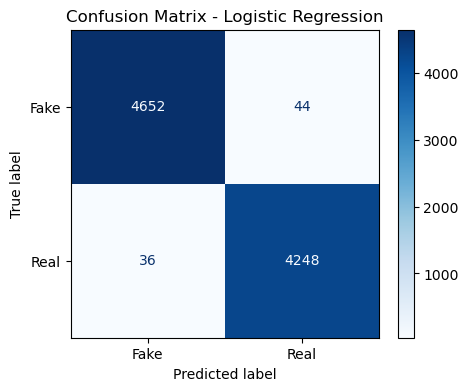

Training model: Naive Bayes
Accuracy of Naive Bayes: 0.9452 

              precision    recall  f1-score   support

        Fake       0.95      0.95      0.95      4696
        Real       0.94      0.94      0.94      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980


Confusion Matrix just before plotting:
[[4458  238]
 [ 254 4030]]
Shape of cm: (2, 2)
Type of cm: <class 'numpy.ndarray'>


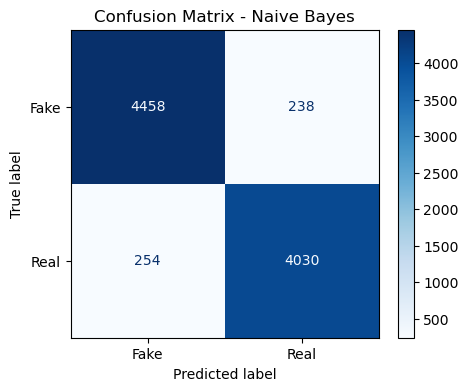

Training model: SVM
Accuracy of SVM: 0.9955 

              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4696
        Real       0.99      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Confusion Matrix just before plotting:
[[4672   24]
 [  16 4268]]
Shape of cm: (2, 2)
Type of cm: <class 'numpy.ndarray'>


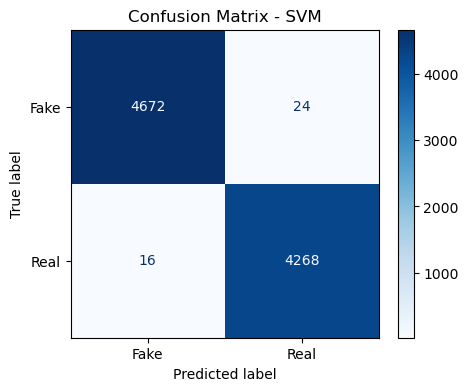

Training model: Random Forest
Accuracy of Random Forest: 0.9978 

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4696
        Real       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Confusion Matrix just before plotting:
[[4682   14]
 [   6 4278]]
Shape of cm: (2, 2)
Type of cm: <class 'numpy.ndarray'>


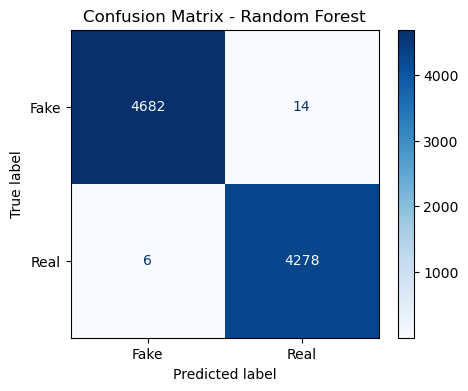

In [47]:
for name, model in models.items():

    print(f"Training model: {name}")

    # Fit the model on the training data
    model.fit(X_train_vector, y_train)

    # Evaluate the model on the test data
    model_score = model.score(X_test_vector, y_test)

    # Make predictions
    y_pred = model.predict(X_test_vector)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {acc:.4f} \n")

    # Store result
    results.append((name, acc))

    # Print classification report
    print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

    
    cm = confusion_matrix(y_test, y_pred)

    # --- Add this for debugging ---
    print("\nConfusion Matrix just before plotting:")
    print(cm) # Calculate the confusion matrix
    print("Shape of cm:", cm.shape)
    print("Type of cm:", type(cm))
    # --- End of debugging block ---

    # Visualize your confusion matrix
    # Create a new figure for each plot
    plt.figure(figsize=(5, 4)) # You can adjust the figure size as needed
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"]) # Use your actual class labels if different
    disp.plot(cmap='Blues', ax=plt.gca()) # Pass the current axes to plot on
    plt.title(f"Confusion Matrix - {name}")
    plt.show() # This line is crucial to display the plot immediately
        

### Second Evaluation

Receiver operating characteristic (ROC) Curve

**Wikipedia defination :** "A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate."

In [50]:
# import relevant libraries

from sklearn.metrics import roc_curve, auc

ROC Curve for Probabilistic Models

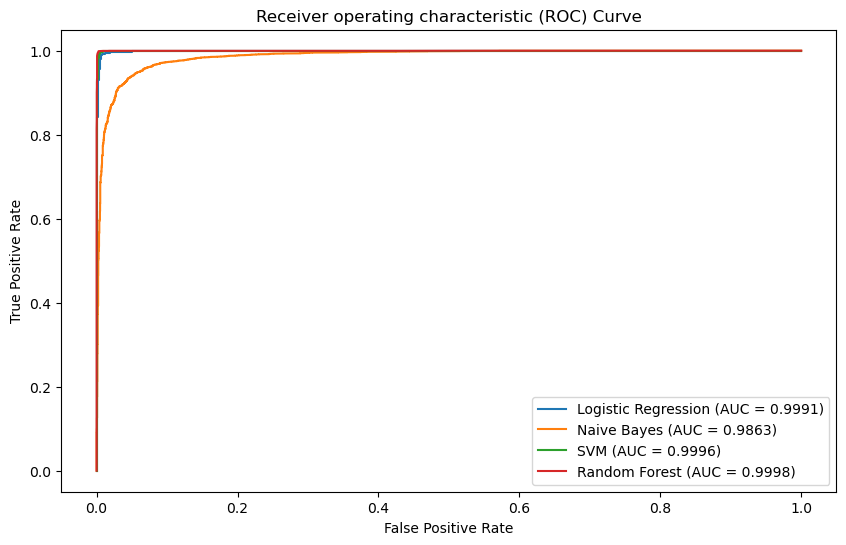

In [58]:
plt.figure(figsize=(10, 6))

for name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            # For models that support predict_proba, use the probability of the positive class
            y_scores = model.predict_proba(X_test_vector)[:, 1]

        elif hasattr(model, "decision_function"):
            # For models that support decision_function, use it directly
            y_scores = model.decision_function(X_test_vector)

        else:
            continue
        
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")
    except:
        continue

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()